# Realización de Topic Modeling con diccionario

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils
from gensim.models.ldamodel import LdaModel

#Upload the files (i.e. hate_migrants.txt)
from google.colab import files
files.upload()


hate_df = pd.read_csv("hate_migrants.txt", sep='\t',  header= None)
hate = hate_df.T.squeeze()

len(hate)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

spanish_stopwords.append('co')
spanish_stopwords.append('vos')
spanish_stopwords.append('si')
spanish_stopwords.append('ser')
spanish_stopwords.append('voy')
spanish_stopwords.append('cara')
spanish_stopwords.append('vamos')
spanish_stopwords.append('https')
spanish_stopwords.append('sos')
spanish_stopwords.append('mil')
spanish_stopwords.append('dice')
spanish_stopwords.append('cada')
spanish_stopwords.append('van')
spanish_stopwords.append('da')
spanish_stopwords.append('dan')
spanish_stopwords.append('después')
spanish_stopwords.append('ojalá')
spanish_stopwords.append('mas')
spanish_stopwords.append('hace')
spanish_stopwords.append('hacer')
spanish_stopwords.append('así')
spanish_stopwords.append('va')
spanish_stopwords.append('años')
spanish_stopwords.append('toda')
spanish_stopwords.append('tener')
spanish_stopwords.append('puede')
spanish_stopwords.append('ahora')
spanish_stopwords.append('tan')
spanish_stopwords.append('quieren')
spanish_stopwords.append('re')
spanish_stopwords.append('vas')
spanish_stopwords.append('mismo')
spanish_stopwords.append('cabeza')
spanish_stopwords.append('dos')
spanish_stopwords.append('ver')

#spanish_stopwords.remove('Palabra')

cv_es = CountVectorizer(min_df=.01, stop_words = spanish_stopwords) #Check different trimming: https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
e = cv_es.fit_transform(hate)
e


Saving hate_migrants.txt to hate_migrants.txt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<3751x66 sparse matrix of type '<class 'numpy.int64'>'
	with 9104 stored elements in Compressed Sparse Row format>

In [ ]:
corpus_es = matutils.Sparse2Corpus(e, documents_columns=False)
vocab = dict(enumerate(cv_es.get_feature_names_out()))

lda = LdaModel(corpus_es, num_topics=5, id2word=vocab, random_state=123, alpha='asymmetric') #Choose differente number of topics and different alphas (asymmetric, symmetric, auto)
pd.DataFrame({f"Topic {topicno}": [w for (w, tw) in words]
              for (topicno, words) in lda.show_topics(formatted=False)})


,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,mierda,asco,mierda,puta,china
1,negros,mierda,negro,negra,vez
2,inmigrantes,negros,negra,hijo,puta
3,país,deportar,puto,hija,menos
4,negro,deportarlos,basura,hijos,odio
5,puta,chino,asco,madre,negra
6,ilegales,mal,vivir,casa,mejor
7,gente,hdp,solo,ustedes,casa
8,putos,pueden,sucio,venezuela,maldito
9,negra,venezuela,maldito,mierda,mierda


No charts were generated by quickchart


In [ ]:
# @title Texto de título predeterminado
topics = pd.DataFrame([dict(lda.get_document_topics(doc, minimum_probability=0.0))
                      for doc in corpus_es])
meta = hate_df.iloc[hate.index].drop(columns=[0]).reset_index(drop=True)
tpd = pd.concat([meta, topics], axis=1)
tpd.head()

,0,1,2,3,4
0,0.138958,0.751025,0.044566,0.035609,0.029842
1,0.625821,0.046936,0.274934,0.028438,0.023871
2,0.112214,0.076750,0.058571,0.712677,0.039789
3,0.171550,0.609860,0.087847,0.071070,0.059673
4,0.774281,0.079324,0.059220,0.047387,0.039789


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

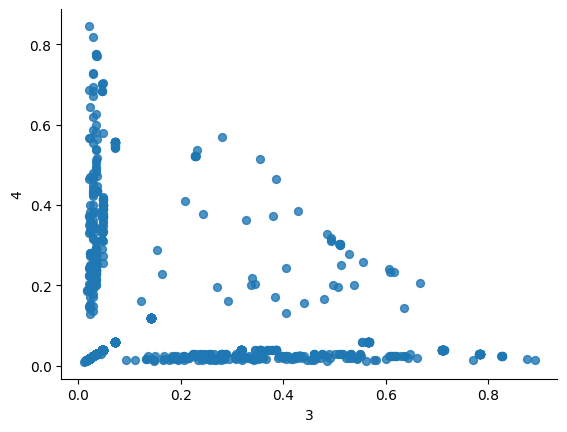

In [ ]:
# @title 3 vs 4

from matplotlib import pyplot as plt
tpd.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

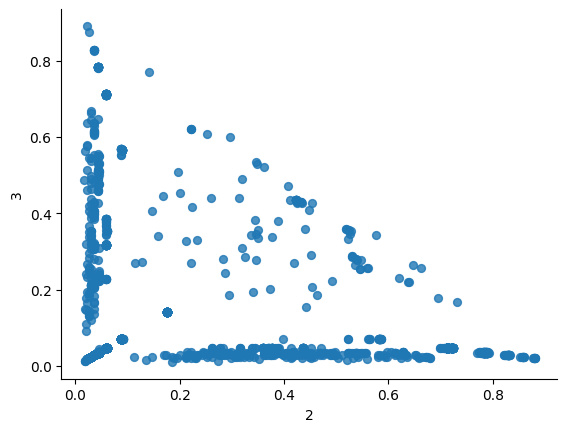

In [ ]:
# @title 2 vs 3

from matplotlib import pyplot as plt
tpd.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

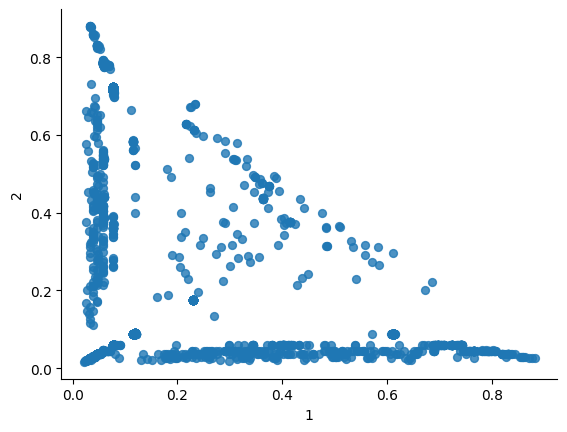

In [ ]:
# @title 1 vs 2

from matplotlib import pyplot as plt
tpd.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

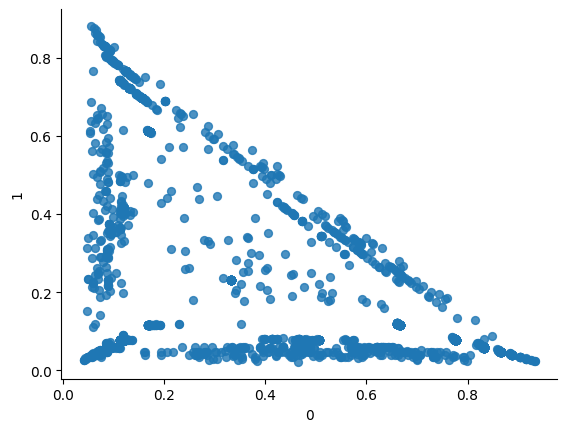

In [ ]:
# @title 0 vs 1

from matplotlib import pyplot as plt
tpd.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Instalación de bibliotecas necesarias para las gráficas
!pip install pyLDAvis
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.4 MB/s eta 0:00:00


<ipython-input-13-30db2a257641>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=weights, palette="viridis")


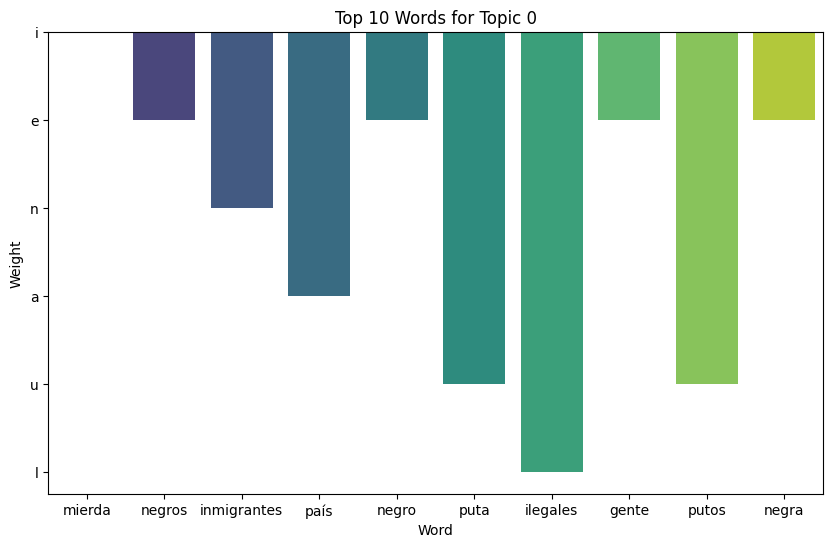

<ipython-input-13-30db2a257641>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=weights, palette="viridis")


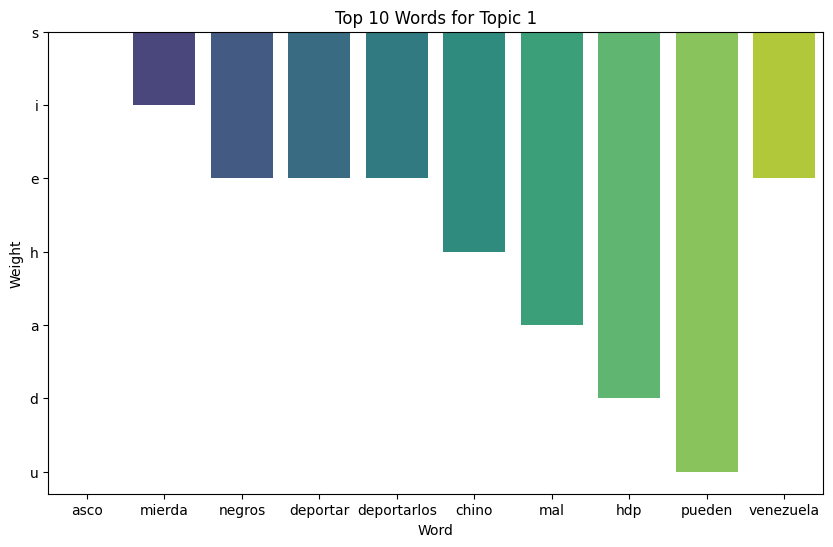

<ipython-input-13-30db2a257641>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=weights, palette="viridis")


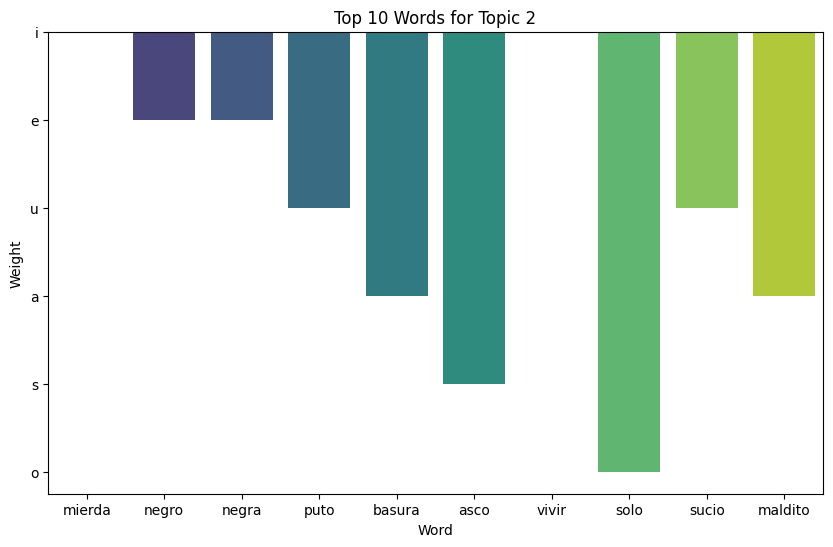

<ipython-input-13-30db2a257641>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=weights, palette="viridis")


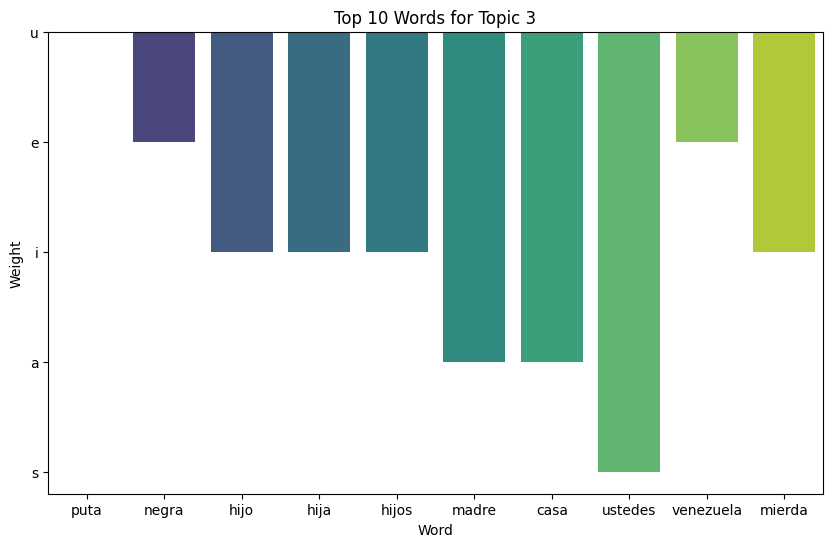

<ipython-input-13-30db2a257641>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=weights, palette="viridis")


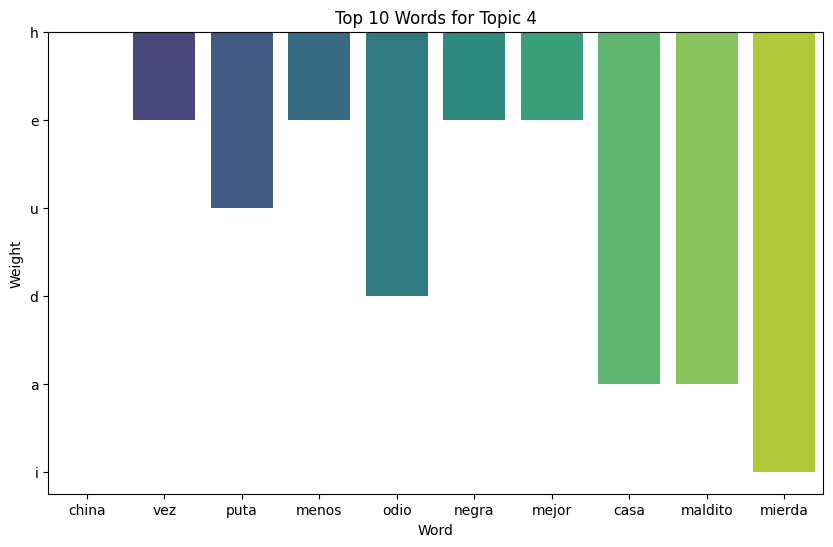

In [ ]:
# Número de palabras que se mostrarán por tema
top_words_per_topic = 10

# IMás librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de barras para las palabras más importantes de cada tema
for topicno, words in lda.show_topics(formatted=False, num_words=top_words_per_topic):
    words = [word[0] for word in words]  # Palabras
    weights = [word[1] for word in words]  # Ponderación
    plt.figure(figsize=(10, 6))
    sns.barplot(x=words, y=weights, palette="viridis")
    plt.title(f'Top {top_words_per_topic} Words for Topic {topicno}')
    plt.xlabel('Word')
    plt.ylabel('Weight')
    plt.show()

<ipython-input-34-e50f9d95edb0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_distribution.index, y=topic_distribution.values, palette="viridis")


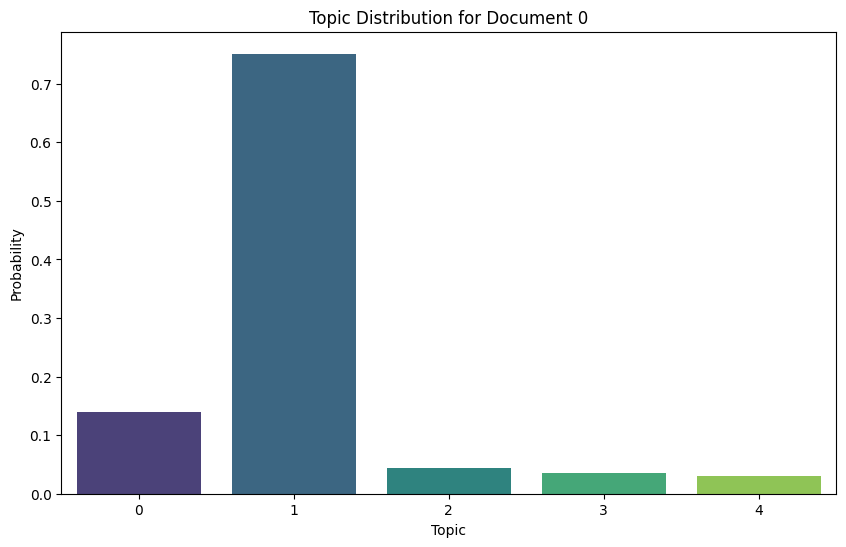

In [ ]:
# Obtener los temas de cada documento
topics = pd.DataFrame([dict(lda.get_document_topics(doc, minimum_probability=0.0)) for doc in corpus_es])

# Graficar la distribución de los temas para el primer documento
doc_idx = 0
topic_distribution = topics.iloc[doc_idx].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=topic_distribution.index, y=topic_distribution.values, palette="viridis")
plt.title(f'Topic Distribution for Document {doc_idx}')
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-219940850a1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_probabilities.index, y=topic_probabilities.values, palette="Blues_d")


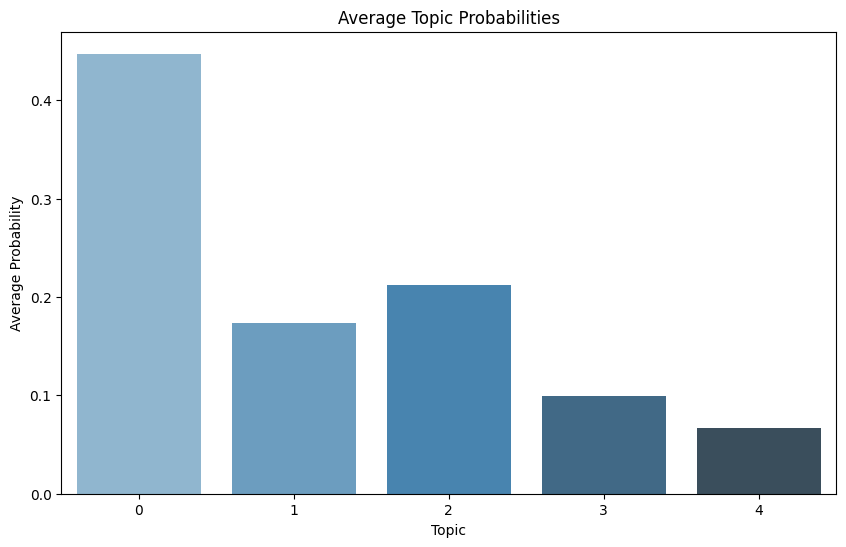

<ipython-input-38-219940850a1a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_variance.index, y=topic_variance.values, palette="Reds_d")


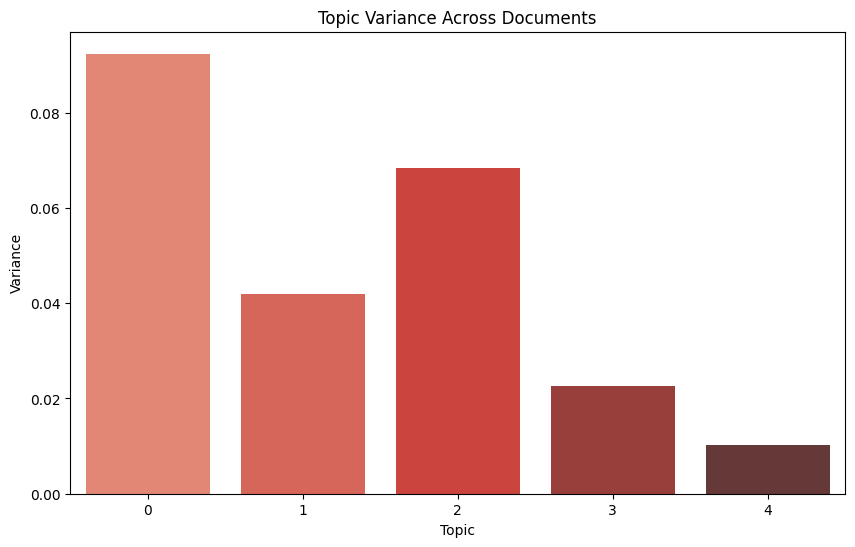

In [ ]:
# Obtener la probabilidad promedio de cada tema en todos los documentos
topic_probabilities = topics.mean(axis=0)

# Visualizar la probabilidad promedio de cada tema
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_probabilities.index, y=topic_probabilities.values, palette="Blues_d")
plt.title('Average Topic Probabilities')
plt.xlabel('Topic')
plt.ylabel('Average Probability')
plt.show()

# Calcular la dispersión de los temas a través de los documentos
topic_variance = topics.var(axis=0)

# Visualizar la varianza de los temas
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_variance.index, y=topic_variance.values, palette="Reds_d")
plt.title('Topic Variance Across Documents')
plt.xlabel('Topic')
plt.ylabel('Variance')
plt.show()


In [ ]:
# Combina los metadatos y las probabilidades de los temas en un solo DataFrame
meta = hate_df.iloc[hate.index].drop(columns=[0]).reset_index(drop=True)
tpd = pd.concat([meta, topics], axis=1)

# Mostrar las primeras filas
tpd.head()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4
0,0.138695,0.751289,0.044566,0.035609,0.029842
1,0.625838,0.046936,0.274917,0.028438,0.023871
2,0.112215,0.076750,0.058571,0.712676,0.039789
3,0.171557,0.609853,0.087847,0.071070,0.059673
4,0.774290,0.079315,0.059220,0.047387,0.039789
